In [1]:
import pandas as pd

# **NADAC Data Analysis**

In [2]:
# Get NADAC data from source csv file
nadacData = pd.read_csv('nadac-national-average-drug-acquisition-cost-02-23-2022.csv')

In [3]:
# Display top rows
nadacData.head()

,NDC Description,NDC,NADAC_Per_Unit,Effective_Date,Pricing_Unit,Pharmacy_Type_Indicator,OTC,Explanation_Code,Classification_for_Rate_Setting,Corresponding_Generic_Drug_NADAC_Per_Unit,Corresponding_Generic_Drug_Effective_Date,As of Date
0,12HR NASAL DECONGEST ER 120 MG,24385005452,0.29366,12/22/2021,EA,C/I,Y,1,G,NaN,NaN,01/05/2022
1,12HR NASAL DECONGEST ER 120 MG,70000047501,0.29366,12/22/2021,EA,C/I,Y,1,G,NaN,NaN,01/05/2022
2,24H NASAL ALLERGY 55 MCG SPRAY,46122038576,0.78092,12/22/2021,ML,C/I,Y,"1, 5",G,NaN,NaN,01/05/2022
3,24HR ALLERGY(LEVOCETIRZN) 5 MG,70000036201,0.19147,12/22/2021,EA,C/I,Y,1,G,NaN,NaN,01/05/2022
4,24HR ALLERGY(LEVOCETIRZN) 5 MG,70000036202,0.19147,12/22/2021,EA,C/I,Y,1,G,NaN,NaN,01/05/2022


In [4]:
# Get dataset shape
nadacData.shape

(199120, 12)

## **Comparison of OTC v. Non-OTC Drugs**
This comparison involves determining the differences between the two sets of drugs in terms of count and average prices.

In [5]:
pd.DataFrame(nadacData.groupby('OTC')['NDC'].count())

,NDC
OTC,
N,178620
Y,20500


In [6]:
pd.DataFrame(nadacData.groupby('OTC')['NADAC_Per_Unit'].mean())

,NADAC_Per_Unit
OTC,
N,11.038839
Y,0.370504


#### **Observations**
1. There are considerably more non-OTC drugs in the dataset as compared to OTC drugs. 
2. Non-OTC drugs are significantly more epensive than OTC drugs.


## **Analysis of Classifications of Rate Setting**
The Classification_of_Rate_Setting column indicates whether the NDC was considered brand (‘B’) or generic (‘G’) for the NADAC rate calculation process. If the NDC was considered brand (‘B’) and approved under an Abbreviated New Drug Application (ANDA), the indicator is shown as (‘B-ANDA’). NDCs approved as biosimilar products are considered brand (‘B’) and will be designated as (‘B-BIO’). 

In [7]:
pd.DataFrame(nadacData.groupby('Classification_for_Rate_Setting')['NADAC_Per_Unit'].count())

,NADAC_Per_Unit
Classification_for_Rate_Setting,
B,13649
B-ANDA,402
B-BIO,1
G,185068


In [8]:
pd.DataFrame(nadacData.groupby('Classification_for_Rate_Setting')['NADAC_Per_Unit'].mean())

,NADAC_Per_Unit
Classification_for_Rate_Setting,
B,125.389321
B-ANDA,16.895000
B-BIO,25.864150
G,1.410813


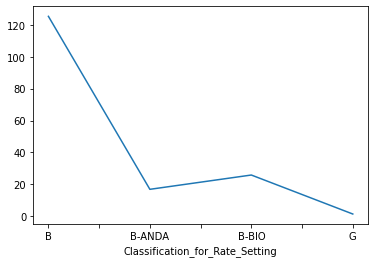

In [9]:
# Histogram to show the distribution of values for the 'NDC' column
nadacData.groupby(['Classification_for_Rate_Setting'])['NADAC_Per_Unit'].mean().plot.line()

#### **Observations**
1. There are considerably more Generic drugs in the dataset than all the other classifications combined.
2. There is a noteable difference between the prices of Brand drugs (most epensive) and Generic drugs (cheapest).


# **State Drug Utilization Data Analysis**

In [10]:
# Read data from source file
utilData = pd.read_csv('DrugUtilization2021.csv')

In [11]:
# Display top rows
utilData.head()

,utilization_type,state,ndc,labeler_code,product_code,package_size,year,quarter,suppression_used,product_name,units_reimbursed,number_of_prescriptions,total_amount_reimbursed,medicaid_amount_reimbursed,non_medicaid_amount_reimbursed
0,FFSU,AK,2143380,2,1433,80,2021,4,False,TRULICITY,552.0,225.0,223223.83,218738.63,4485.20
1,FFSU,AK,2143480,2,1434,80,2021,4,False,TRULICITY,714.0,277.0,289795.80,284447.68,5348.12
2,FFSU,AK,2143611,2,1436,11,2021,4,False,EMGALITY P,27.0,27.0,16648.52,16648.52,0.00
3,FFSU,AK,2144509,2,1445,9,2021,4,True,TALTZ AUTO,NaN,NaN,NaN,NaN,NaN
4,FFSU,AK,2144511,2,1445,11,2021,4,False,TALTZ AUTO,14.0,14.0,83578.05,72671.03,10907.02


In [12]:
# Display dataset shape
utilData.shape

(122025, 15)

In [13]:
# Remove columns which will not be used in analysis
toDrop = [
    'labeler_code', 
    'product_code', 
    'package_size',
    'year',
    'suppression_used',
    'product_name'
]

utilData = utilData.drop(columns=toDrop)

# Rename 'ndc' column in utilData to 'NDC' to match corresponding column name in nadacData
utilData = utilData.rename(columns={'ndc': 'NDC'})

In [14]:
# Note the result of the drop and rename operations
utilData.head()

,utilization_type,state,NDC,quarter,units_reimbursed,number_of_prescriptions,total_amount_reimbursed,medicaid_amount_reimbursed,non_medicaid_amount_reimbursed
0,FFSU,AK,2143380,4,552.0,225.0,223223.83,218738.63,4485.20
1,FFSU,AK,2143480,4,714.0,277.0,289795.80,284447.68,5348.12
2,FFSU,AK,2143611,4,27.0,27.0,16648.52,16648.52,0.00
3,FFSU,AK,2144509,4,NaN,NaN,NaN,NaN,NaN
4,FFSU,AK,2144511,4,14.0,14.0,83578.05,72671.03,10907.02


In [15]:
joinedData = nadacData.set_index('NDC').join(utilData.set_index('NDC'), how='inner', on='NDC')

In [16]:
joinedData.head()

,NDC Description,NADAC_Per_Unit,Effective_Date,Pricing_Unit,Pharmacy_Type_Indicator,OTC,Explanation_Code,Classification_for_Rate_Setting,Corresponding_Generic_Drug_NADAC_Per_Unit,Corresponding_Generic_Drug_Effective_Date,As of Date,utilization_type,state,quarter,units_reimbursed,number_of_prescriptions,total_amount_reimbursed,medicaid_amount_reimbursed,non_medicaid_amount_reimbursed
NDC,,,,,,,,,,,,,,,,,,,
378410591,ABACAVIR 300 MG TABLET,0.43924,12/22/2021,EA,C/I,N,1,G,NaN,NaN,01/05/2022,FFSU,AL,4,NaN,NaN,NaN,NaN,NaN
378410591,ABACAVIR 300 MG TABLET,0.43924,12/22/2021,EA,C/I,N,1,G,NaN,NaN,01/05/2022,FFSU,AL,3,NaN,NaN,NaN,NaN,NaN
378410591,ABACAVIR 300 MG TABLET,0.43924,12/22/2021,EA,C/I,N,1,G,NaN,NaN,01/05/2022,FFSU,AL,2,NaN,NaN,NaN,NaN,NaN
378410591,ABACAVIR 300 MG TABLET,0.43924,12/22/2021,EA,C/I,N,1,G,NaN,NaN,01/05/2022,FFSU,AL,1,NaN,NaN,NaN,NaN,NaN
378410591,ABACAVIR 300 MG TABLET,0.43924,12/22/2021,EA,C/I,N,1,G,NaN,NaN,01/05/2022,FFSU,AR,4,NaN,NaN,NaN,NaN,NaN


#### **OTC-Prescription Relationship**
The combined data allows for investigating whether a drug being OTC affects how many times it is prescribed.

In [17]:
pd.DataFrame(joinedData.groupby(['OTC'])['number_of_prescriptions'].mean())

,number_of_prescriptions
OTC,
N,169.825223
Y,334.050108


#### **Observation**
OTC drugs are prescribed about twice as much as non-OTC drugs.

#### **Correlation between Utilization Type and NADAC per Unit**
The combined data allows for investigating the relationship between utilization type and NADAC per unit.
FFSU stands for Fee-For-Service Utilization
MCOU stands for Managed Care Organization Utilization

In [18]:
pd.DataFrame(joinedData.groupby(['utilization_type'])['NADAC_Per_Unit'].mean())

,NADAC_Per_Unit
utilization_type,
FFSU,17.417098
MCOU,21.083569


#### **Observation**
MCOU is associated with slightly more expensive drugs than FFSU.

#### **Analysis from Data Visualization**
Graphs can sometimes reveal an aspect of data that may be hidden when only observing numbers.

In [19]:
df = pd.DataFrame(
    joinedData.groupby(
        [
            'utilization_type', 
            'OTC'
        ]
    )['total_amount_reimbursed'].mean()
)
df = df.reset_index()
pivoted = df.pivot(index='utilization_type', columns='OTC', values='total_amount_reimbursed')

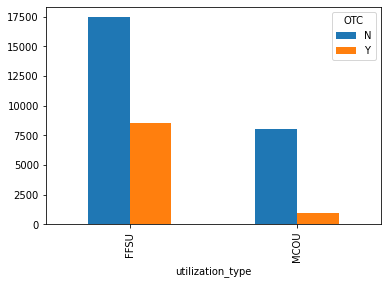

In [20]:
pivoted.plot.bar()

#### **Observation**
The total amount reimbursed for OTC drugs in FFSU and MCOU is relatively low.



---



## Submitting Your Work

In order to submit your work, you'll need to use the `git` command line program to **add** your homework file (this file) to your local repository, **commit** your changes to your local repository, and then **push** those changes up to github.com.  From there, I'll be able to **pull** the changes down and do my grading.  I'll provide some feedback, **commit** and **push** my comments back to you.  Next week, I'll show you how to **pull** down my comments.

To run through everything one last time and submit your work:
1. Use the `Kernel` -> `Restart Kernel and Run All Cells` menu option to run everything from top to bottom and stop here.
2. Follow the instruction on the prompt below to either ssave and submit your work, or continue working.

If anything fails along the way with this submission part of the process, let me know.  I'll help you troubleshoort.

In [21]:
a=input('''
Are you ready to submit your work?
1. Click the Save icon (or do Ctrl-S / Cmd-S)
2. Type "yes" or "no" below
3. Press Enter

''')

if a=='yes':
    !git add .
    !git commit -a -m "Submitting the final project"
    !git push
else:
    print('''
    
OK. We can wait.
''')



Are you ready to submit your work?
1. Click the Save icon (or do Ctrl-S / Cmd-S)
2. Type "yes" or "no" below
3. Press Enter

 yes


[main 6ba01cb] Submitting the final project
 3 files changed, 322638 insertions(+)
 create mode 100644 final/DrugUtilization2021.csv
 create mode 100644 final/final_project.ipynb
 create mode 100644 final/nadac-national-average-drug-acquisition-cost-02-23-2022.csv
Counting objects: 6, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (6/6), done.
Writing objects: 100% (6/6), 4.01 MiB | 3.75 MiB/s, done.
Total 6 (delta 1), reused 0 (delta 0)
remote: Resolving deltas: 100% (1/1), completed with 1 local object.
To github.com:sharmapallvi/hds5210-2022.git
   8f79a82..6ba01cb  main -> main
